In [1]:
import numpy as np
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot as plt

In [2]:
def objective(x, y):
	return 2*(x**2)-1.05*(x**4)+((x**6)/6)+(x*y)+(y**2)
def derivative(x, y):
	return np.asarray([(x**5 - 4.2*x**3+4*x+y), (x+2*y)])

In [3]:
def print3d(objective, r_min=-1.0, r_max=1.0):
	# define range for input
	#r_min, r_max = -1.0, 1.0
	# sample input range uniformly at 0.1 increments
	xaxis = arange(r_min, r_max, 0.1)
	yaxis = arange(r_min, r_max, 0.1)
	# create a mesh from the axis
	x, y = meshgrid(xaxis, yaxis)
	# compute targets
	results = objective(x, y)
	# create a surface plot with the jet color scheme
	figure = plt.figure(figsize=(12, 8))
	axis = figure.gca(projection='3d')
	axis.plot_surface(x, y, results, cmap='jet')
	# show the plot
	plt.show()

In [4]:
def print2d(objective, solutions=[], cords=[0,0], r_min=-1.0, r_max=1.0, nopoint=False, levels=20):
    # define range for input
    bounds = np.asarray([[r_min, r_max], [r_min, r_max]])
    # sample input range uniformly at 0.1 increments
    xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
    yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
    # create a mesh from the axis
    x, y = meshgrid(xaxis, yaxis)
    # compute targets
    results = objective(x, y)
    # create a filled contour plot with 50 levels and jet color scheme
    ax = plt.contour(x, y, results, levels=levels, cmap='jet')
    plt.clabel(ax, fontsize=9, inline=1)
    if (nopoint == True):
        plt.scatter(cords[0],cords[1],c='red')
        plt.plot(solutions[:, 0], solutions[:, 1], '-', color='r')
    # show the plot
    plt.show()

/run/user/1000/ipykernel_61912/3914080298.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


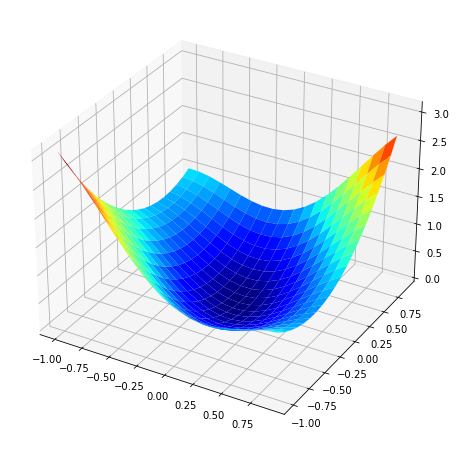

In [5]:
print3d(objective)

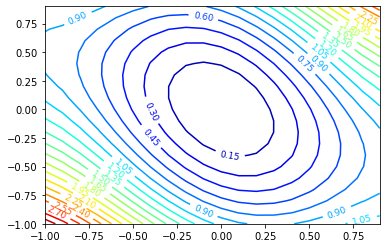

In [6]:
print2d(objective)

In [7]:
def adam(
    objective,
    derivative,
    bounds=np.asarray([[-1.0, 1.0], [-1.0, 1.0]]),
    n_iter=60,
    alpha=0.02,
    beta1=0.8,
    beta2=0.999,
    eps=1e-8,
    ):
    """
    Adam

    Args:
        objective (_type_): Function
        derivative (_type_): Derivative of a function
        bounds (_type_): Bounds of problem.
        n_iter (int, optional): Number of iterations. Defaults to 60.
        alpha (float, optional): Step size. Defaults to 0.02.
        beta1 (float, optional): Factor of average gradient. Defaults to 0.8.
        beta2 (float, optional): Factor of average gradient squared. Defaults to 0.999.
        eps (_type_, optional): _description_. Defaults to 1e-8.

    Returns:
        _type_: Point
    """
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:,0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i] ** 2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1 ** (t + 1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2 ** (t + 1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        solutions.append(x.copy())
        print ('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score, solutions]

In [8]:
def moment(
		objective, 
		derivative, 
		bounds=np.asarray([[-1.0, 1.0], [-1.0, 1.0]]), 
		n_iter=60, 
		step_size=0.1,
		momentum=0.3
		):
	solutions = list()
	# generate an initial point
	x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [x[i] + momentum * change[i] for i in range(x.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_x = list()
		for i in range(x.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = x[i] + change[i]
			# store this variable
			new_x.append(value)
		# evaluate candidate point
		x = np.asarray(new_x)
		score = objective(x[0], x[1])
		solutions.append(x.copy())
		# report progress
		print('>%d f(%s) = %.5f' % (it, x, score))
	return [x, score, solutions]

In [15]:
cords, score, solutions = adam(objective,derivative,bounds=np.asarray([[-3.0, 3.0], [-3.0, 3.0]]), n_iter=300)

>0 f([2.76973904 0.69808804]) = 31.21572
>1 f([2.74979663 0.67810437]) = 29.46705
>2 f([2.72995022 0.65814802]) = 27.80494
>3 f([2.71023746 0.63822993]) = 26.22846
>4 f([2.69069471 0.61836083]) = 24.73617
>5 f([2.67135649 0.59855117]) = 23.32622
>6 f([2.652255   0.57881101]) = 21.99635
>7 f([2.6334198  0.55914992]) = 20.74395
>8 f([2.61487745 0.53957695]) = 19.56614
>9 f([2.59665135 0.52010054]) = 18.45983
>10 f([2.57876162 0.50072849]) = 17.42175
>11 f([2.56122507 0.48146799]) = 16.44852
>12 f([2.54405527 0.46232553]) = 15.53671
>13 f([2.52726264 0.443307  ]) = 14.68289
>14 f([2.51085464 0.42441765]) = 13.88365
>15 f([2.49483598 0.40566212]) = 13.13565
>16 f([2.47920883 0.3870445 ]) = 12.43565
>17 f([2.46397314 0.36856835]) = 11.78053
>18 f([2.44912684 0.35023676]) = 11.16729
>19 f([2.43466614 0.33205235]) = 10.59309
>20 f([2.42058577 0.31401738]) = 10.05523
>21 f([2.40687922 0.29613371]) = 9.55118
>22 f([2.39353898 0.27840293]) = 9.07855
>23 f([2.38055673 0.26082631]) = 8.63513
>24 f

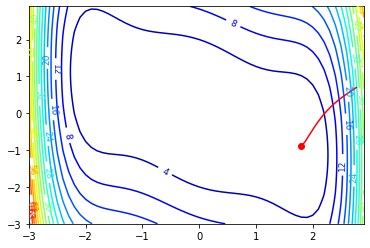

In [16]:
print2d(objective, np.asarray(solutions), cords, nopoint=True, r_max=3, r_min=-3)

In [17]:
cords, score, solutions = moment(objective,derivative, bounds=np.asarray([[-3.0, 3.0], [-3.0, 3.0]]),n_iter=300)

>0 f([ 1.03018677 -1.38306375]) = 1.62720
>1 f([ 0.67802182 -1.15739146]) = 1.26853
>2 f([ 0.52500548 -0.92898905]) = 0.85028
>3 f([ 0.41717094 -0.73628472]) = 0.55210
>4 f([ 0.32183028 -0.58126079]) = 0.34687
>5 f([ 0.23978469 -0.4571257 ]) = 0.21091
>6 f([ 0.17522909 -0.35742524]) = 0.12555
>7 f([ 0.12785004 -0.27759832]) = 0.07398
>8 f([ 0.09416124 -0.21428383]) = 0.04339
>9 f([ 0.07021071 -0.16463705]) = 0.02538
>10 f([ 0.05289468 -0.12609696]) = 0.01482
>11 f([ 0.04011897 -0.09639794]) = 0.00864
>12 f([ 0.03054064 -0.07361921]) = 0.00504
>13 f([ 0.02328774 -0.05619519]) = 0.00293
>14 f([ 0.01776787 -0.04288557]) = 0.00171
>15 f([ 0.01355817 -0.03272534]) = 0.00099
>16 f([ 0.01034566 -0.02497134]) = 0.00058
>17 f([ 0.00789401 -0.01905431]) = 0.00034
>18 f([ 0.00602318 -0.01453921]) = 0.00020
>19 f([ 0.0045957  -0.01109394]) = 0.00011
>20 f([ 0.00350654 -0.00846503]) = 0.00007
>21 f([ 0.00267552 -0.00645906]) = 0.00004
>22 f([ 0.00204146 -0.00492844]) = 0.00002
>23 f([ 0.00155768 -0

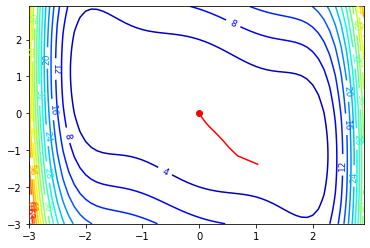

In [18]:
print2d(objective, np.asarray(solutions), cords, nopoint=True, r_max=3, r_min=-3)